In [1]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import pandas as pd

C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd

# สร้างข้อมูล
data = {
    "code": ["AE106", "AE106", "AE200", "AE205", "AE211", "AE280", "AE284", "AE284", "AE311", "AE314", "AE315", "AE317", "AE318", "AE327", "AE348", "AE359"],
    "desc": [
        "BASICS OF ECOLOGY FOR ENVIRONMENT AND NATURAL RESOURCE CONSERVATION. LIFE-CYCLE ASSESSMENT. CHARACTERISATION OF POLLUTIONS AND THEIR IMPACTS ON THE SOCIETY. CONCEPTS ABOUT SUSTAINABILITY OF NATURAL RESOURCES AND ENERGY. ENVIRONMENTAL ETHICS. SUSTAINABLE DESIGN. ENERGY CONSUMPTION IN THAILAND. ENERGY CONSUMPTION IN TRANSPORTATION, INDUSTRIES, AND BUILDINGS. SUSTAINABILITY OF ENERGY FOR THAILAND. ELECTRICITY GENERATION IN THAILAND. ENERGY CONSERVATION. ALTERNATIVE ENERGY. SOLAR ENERGY. WIND ENERGY. BIOMASS FOR ENERGY. ETHANOL PRODUCTION. BIODIESEL PRODUCTION. CLEAN COAL TECHNOLOGY. NUCLEAR ENERGY.",
        "BASICS OF ECOLOGY FOR ENVIRONMENT AND NATURAL RESOURCE CONSERVATION. LIFE-CYCLE ASSESSMENT. CHARACTERISATION OF POLLUTIONS AND THEIR IMPACTS ON THE SOCIETY. CONCEPTS ABOUT SUSTAINABILITY OF NATURAL RESOURCES AND ENERGY. ENVIRONMENTAL ETHICS. SUSTAINABLE DESIGN. ENERGY CONSUMPTION IN THAILAND. ENERGY CONSUMPTION IN TRANSPORTATION, INDUSTRIES, AND BUILDINGS. SUSTAINABILITY OF ENERGY FOR THAILAND. ELECTRICITY GENERATION IN THAILAND. ENERGY CONSERVATION. ALTERNATIVE ENERGY. SOLAR ENERGY. WIND ENERGY. BIOMASS FOR ENERGY. ETHANOL PRODUCTION. BIODIESEL PRODUCTION. CLEAN COAL TECHNOLOGY. NUCLEAR ENERGY.",
        "BONDING IN ORGANIC MOLECULES. CLASSES AND NOMENCLATURE OF ORGANIC COMPOUNDS. CHARACTERISTIC REACTIONS OF ORGANIC COMPOUNDS. REACTION MECHANISM. STEREOCHEMISTRY. INDUCTIVE EFFECT, STERIC EFFECT, AND RESONANCE EFFECT. NUCLEOPHILIC ADDITION AND SUBSTITUTION. ELIMINATION REACTION. ELECTROPHILIC ADDITION AND SUBSTITUTION. AMINO ACIDS AND PROTEINS. SUGARS AND CARBOHYDRATES. FATS AND OILS. BUFFER SOLUTIONS. DRUG DESIGN AND DRUG DELIVERY SYSTEM.",
        "ELEMENTARY PRINCIPLES OF MATERIAL AND ENERGY BALANCES FOR CHEMICAL PROCESSES, BOTH WITH AND WITHOUT CHEMICAL REACTIONS. FUNDAMENTALS OF SELECTED UNIT OPERATIONS. INTRODUCTION OF PROCESS FLOW DIAGRAM. COLLECTION, DETERMINATION, AND CALCULATIONS OF DATA REQUIRED FOR MATERIAL AND ENERGY BALANCES. INTEGRATION OF MATERIAL AND ENERGY BALANCE ON CHEMICAL ENGINEERING PROCESSES.",
        "INTRODUCTION TO THERMODYNAMICS AND ENGINEERING THERMODYNAMICS. DEFINITIONS OF SOME TECHNICAL TERMS RELATED TO ENGINEERING THERMODYNAMICS. PROPERTIES OF PURE SUBSTANCES. EQUATION OF STATE OF IDEAL AND REAL GASES. COMPRESSIBILITY. THERMODYNAMIC DIAGRAMS AND TABLES. FIRST LAW OF THERMODYNAMICS FOR CLOSED SYSTEM AND FOR CONTROL VOLUME. SECOND LAW OF THERMODYNAMICS. ENTROPY. APPLICATIONS OF FIRST LAW, SECOND LAW AND ENTROPY ON THERMODYNAMICS. CALCULATIONS FOR REAL PROCESSES. (FOR STUDENTS OUTSIDE THE DEPARTMENT OF CHEMICAL ENGINEERING)",
        "GENERATING FORMS. WRITING MEMORANDA. WRITING EMAILS. WRITING LETTERS. WRITING WEEKLY REPORTS. WRITING EXPERIMENTAL NOTEBOOKS. WRITING LABORATORY REPORTS. WRITING ABSTRACTS. WRITING RESEARCH ARTICLES. EXPRESSING EXPERIMENTAL RESULTS IN GRAPHS, FIGURES, TABLES AND DIAGRAMS. MAKING A LIST OF REFERENCES. USING SOFTWARES CONCERNING DOCUMENT WRITING. USING TECHNIQUES SUCH AS INFOGRAPHIC IN DATA PRESENTATION. WRITING IN ENGLISH.",
        "LABORATORY FOR QUANTITATIVE ANALYSIS SUCH AS GRAVIMETRY AND TITRIMETRY BY ACID-BASE. PRECIPITATION AND REDOX REACTIONS. SEPARATION BY EXTRACTION, RECRYSTALLIZATION, AND VARIOUS KINDS OF DISTILLATION. DETERMINATION OF CHEMICAL EQUILIBRIUM CONSTANT. FERMENTATION. SYNTHESIS OF CHEMICAL COMPOUNDS.",
        "LABORATORY FOR QUANTITATIVE ANALYSIS SUCH AS GRAVIMETRY AND TITRIMETRY BY ACID-BASE. PRECIPITATION AND REDOX REACTIONS. SEPARATION BY EXTRACTION, RECRYSTALLIZATION, AND VARIOUS KINDS OF DISTILLATION. DETERMINATION OF CHEMICAL EQUILIBRIUM CONSTANT. FERMENTATION. SYNTHESIS OF CHEMICAL COMPOUNDS.",
        "THEORIES AND APPLICATIONS OF HEAT TRANSPORT PHENOMENA, EMPHASIZING ANALOGIES AND CONTRASTS TO THOSE OF MOMENTUM TRANSPORT. FOURIER’S LAW. STEADY-STATE AND TRANSIENT THERMAL CONDUCTION. THERMAL RESISTANCE NETWORK CONCEPT. HEAT TRANSFER FROM EXTENDED SURFACES. INSULATORS. CONVECTIVE HEAT TRANSFER COEFFICIENTS. BOILING AND CONDENSATION. RADIATION. DESIGN OF HEAT EXCHANGERS. CONCEPT AND RELATED THEORIES OF EVAPORATOR.",
        "THERMODYNAMIC PROPERTIES OF REAL AND IDEAL GASES. FUNDAMENTAL THERMODYNAMIC EQUATIONS AND THERMODYNAMIC PROPERTY RELATIONS. DETERMINATION OF RESIDUAL PROPERTIES USING EQUATION OF STATE OR GENERALIZED CORRELATION. THERMODYNAMIC PROPERTY DETERMINATION USING DIFFERENTIAL EQUATIONS THERMODYNAMICS OF SOLUTION AND PARTIAL PROPERTIES. FUGACITY AND FUGACITY COEFFICIENT. IDEAL SOLUTION AND NON-IDEAL SOLUTION. EXCESS PROPERTIES AND ACTIVITY COEFFICIENT. PHASE EQUILIBRIA BETWEEN SOLID, LIQUID AND VAPOR BUT FOCUSING ON VAPOR AND LIQUID EQUILIBRIUM. CHEMICAL REACTION EQUILIBRIA.",
        "DEVELOPMENT AND APPLICATION OF THE THEORY OF CHEMICAL KINETICS INCLUDING COLLISION AND TRANSITION STATE. INTERPRETATION OF CHEMICAL RATE AND SELECTIVITY DATA IN HOMOGENEOUS REACTION SYSTEMS. DESIGN AND SIZING OF IDEAL AND NON-IDEAL CHEMICAL REACTORS. DISTRIBUTIONS OF RESIDENCE TIMES FOR CHEMICAL REACTORS. REACTOR DESIGN OF NON-ISOTHERMAL SYSTEMS. INTRODUCTION TO KINETICS OF SURFACE-CATALYZED REACTIONS AND MASS-TRANSFER LIMITATION.",
        "FUNDAMENTAL OF PETROCHEMICAL INDUSTRY. RAW MATERIAL AND SOURCES. MAIN PETROCHEMICAL PRODUCTION PROCESSES SUCH AS ETHYLENE, PROPYLENE, BUTADIENE, BENZENE, TOLUENE AND XYLENES.",
        "TYPES OF CATALYSTS. CONCEPT OF HETEROGENEOUS CATALYSIS. ADSORPTION ISOTHERM. RATE AND KINETIC MODEL OF CATALYTIC REACTION. CATALYST PREPARATION. CATALYST CHARACTERIZATION AND DEACTIVATION. APPLICATIONS OF CATALYSTS.",
        "PRINCIPLE OF LIFE CYCLE ASSESSMENT AND ITS APPLICATION. GOAL AND SCOPE DEFINITION INCLUDING INVENTORY AND IMPACT ASSESSMENT IN TERMS OF QUANTITATIVE ANALYSIS. LIFE CYCLE ASSESSMENT METHODOLOGY AND INTERPRETATION. COMPUTER SIMULATION OF PRODUCT SYSTEMS. COMPARISON OF ENVIRONMENTAL IMPACTS OF PRODUCTS.",
        "DEFINITION OF CORROSION AND CORROSION PHENOMENA, MECHANISMS OF CORROSION, THERMODYNAMICS AND KINETICS OF CORROSION ANODIC AND CATHOLIC PROTECTION, VARIOUS CORROSION MECHANISMS AND CORROSION PREVENTION, MATERIAL SELECTION",
        "PROCESS SIMULATIONS BY USING A WELL-KNOWN COMMERCIAL SOFTWARE TO STUDY THE EFFECTS OF VARIOUS FACTORS IN CHEMICAL ENGINEERING PROCESSES."
    ],
    "add1": [
        [], [], [], ["consecutive course(s): AE334, AE335, AE377, AE461"], ["consecutive course(s): ME390"], [], ["consecutive course(s): AE285"], ["consecutive course(s): AE285"], 
        ["disciplinary course(s): MA111"], ["disciplinary course(s): AE213"], ["disciplinary course(s): MA111"], [], [], [], [], []
    ],
    "add2": [
        [], [], [], [], [], [], [], [], ["consecutive course(s): AE381, AE474, AE477"], ["consecutive course(s): AE377"], ["consecutive course(s): AE367, AE477"], [], [], [], [], []
    ],
    "add3": [
        [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
    ]
}

dataframe = pd.DataFrame(data)

In [7]:
model = SentenceTransformer('paraphrase-mpnet-base-v2')

def create_embeddings():
    dis = list(dataframe["desc"])
    embeddings = model.encode(dis)

    return embeddings

dataframe["embed"] = create_embeddings().tolist()

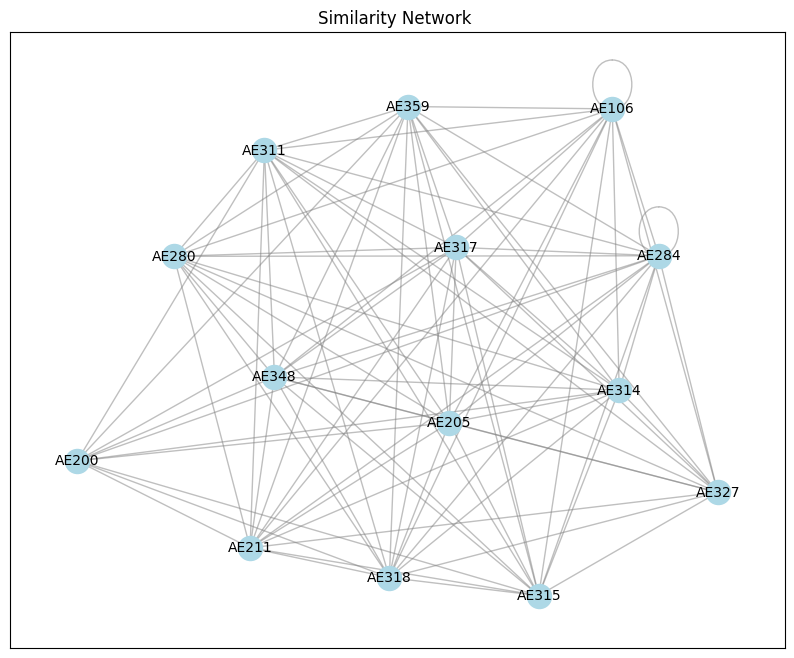

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# คำนวณค่า cosine similarity สำหรับทุกคู่ของ embeddings
def compute_similarity_matrix(dataframe, threshold=0.1):
    embeddings = np.vstack(dataframe["embed"].dropna().to_numpy())   # รวม embeddings เป็น array
    similarity_matrix = cosine_similarity(embeddings)  # คำนวณค่า similarity matrix
    
    pairs = []
    for i in range(len(similarity_matrix)):
        for j in range(i + 1, len(similarity_matrix)):
            if similarity_matrix[i, j] > threshold:
                pairs.append((i, j))  # เก็บ index ของคู่ที่ similarity สูงกว่า threshold
    return pairs

# สร้างกราฟเพื่อ plot พร้อมแสดงชื่อโค้ด
def plot_similarity_graph(dataframe):
    codes = dataframe["code"].tolist()          # นำโค้ดมาใช้เป็นป้ายกำกับ
    pairs = compute_similarity_matrix(dataframe)

    # สร้าง Network Graph
    G = nx.Graph()
    G.add_edges_from([(codes[i], codes[j]) for i, j in pairs])  # ใช้ code เป็นป้ายกำกับแต่ละโหนด

    # Plot กราฟ
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)  # Layout กราฟ
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")  # แสดงชื่อโหนด

    plt.title(f"Similarity Network ")
    plt.show()

# เรียกใช้งาน plot
plot_similarity_graph(dataframe)
